# Explore % in TRA/TRB/TRG/TRD/IGH/IGL/IGK productive vs nonproductive

In [1]:
import numpy as np
import scipy as sp
import scanpy as sc
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sb
from itertools import compress
import random
import scirpy as ir
import os

sc.settings.set_figure_params(dpi = 160, color_map = 'RdYlBu_r', dpi_save = 300, format = 'pdf')
plt.rcParams["figure.figsize"] = [6,6]

In [2]:
sb.set_palette('colorblind')

In [3]:
# import utils
import sys
sys.path.append('/home/jovyan/chenqu_utils')
from array_operations import *

In [4]:
# set working directory
%cd /lustre/scratch117/cellgen/team205/cs42/VDJ_collab_manuscript/

/lustre/scratch117/cellgen/team205/cs42/VDJ_collab_manuscript


In [5]:
# figure directory
fig_path = '/home/jovyan/mount/gdrive/VDJ_collab/plots_output/chenqu_jhub/'
sc.settings.figdir = fig_path

# Load data

### abTCR

In [6]:
path = '/lustre/scratch117/cellgen/team205/sharedData/cs42/all-dandelion-paper-map/'

In [7]:
# load metadata
meta = pd.read_csv('metadata/abTCR_metadata_cleaned_24032022.csv')

In [8]:
# load all contigs
vdj = None
for lane_id, gex_id in zip(meta['lane_id'], meta['GEX_id']):
    if os.path.exists(path+lane_id+'/dandelion/tmp/all_contig_igblast_db-all.tsv'):
        df = pd.read_csv(path+lane_id+'/dandelion/tmp/all_contig_igblast_db-all.tsv', delimiter='\t', index_col='sequence_id',dtype='object')
    else:
        # for samples with no contigs in db-pass
        df = pd.read_csv(path+lane_id+'/dandelion/tmp/all_contig_igblast_db-fail.tsv', delimiter='\t', index_col='sequence_id',dtype='object')
    
    
    # update index column with lane_id info
    df.index = gex_id +'-'+ df.index
    
    # concatenate files from different samples
    if vdj is None:
        vdj = df.copy()
    else:
        vdj = pd.concat([vdj, df], sort=False)
    
    print(lane_id)

FCAImmP7292944
FCAImmP7292941
FCAImmP7292942
FCAImmP7292943
FCAImmP7292947
FCAImmP7292940
FCAImmP7292945
FCAImmP7292946
FCAImmP7607589
FCAImmP7607590
FCAImmP7607591
FCAImmP7607593
FCAImmP7607592
FCAImmP7607594
FCAImmP7607601
FCAImmP7607598
FCAImmP7607595
FCAImmP7607596
FCAImmP7607597
FCAImmP7607599
FCAImmP7607600
FCAImmP7607610
FCAImmP7607611
FCAImmP7607603
FCAImmP7607604
FCAImmP7607605
FCAImmP7607602
FCAImmP7607606
FCAImmP7607607
FCAImmP7607608
FCAImmP7607609
FCAImmP7812643
FCAImmP7812644
FCAImmP7812645
FCAImmP7812646
FCAImmP7812653
FCAImmP7812654
FCAImmP7812655
FCAImmP7812656
FCAImmP7812657
FCAImmP7851882
FCAImmP7851883
FCAImmP7851884
FCAImmP7851885
FCAImmP7851886
FCAImmP7851887
FCAImmP7851888
FCAImmP7851889
FCAImmP7964494
FCAImmP7964497
FCAImmP7964498
FCA_gut8090111
FCA_gut8090112
FCA_gut8090113
FCA_gut8090114
FCA_gut8090115
Human_colon_16S8157847
Human_colon_16S8157848
Human_colon_16S8157849
Human_colon_16S8157850
Human_colon_16S8157851
Human_colon_16S8157852
Human_colon_16S8157853

In [9]:
vdj_ab = vdj.loc[vdj['locus'].isin(['TRA','TRB']),:]

### gdTCR

In [10]:
# load metadata
meta2 = pd.read_csv('metadata/gdTCR_metadata_cleaned_24032022.csv')

In [11]:
meta2 = meta2.loc[~(meta2['GDTCR']=='WSSS_F_Imm10424062'),:] #WSSS_F_Imm10424062 was empty i.e. no contig detected

In [12]:
# load all contigs
vdj2 = None
for lane_id, gex_id in zip(meta2['GDTCR'], meta2['GEX file']):
    if os.path.exists(path+lane_id+'/original/dandelion/tmp/all_contig_igblast_db-all.tsv'):
        df = pd.read_csv(path+lane_id+'/original/dandelion/tmp/all_contig_igblast_db-all.tsv', delimiter='\t', index_col='sequence_id',dtype='object')
    else:
        # for samples with no contigs in db-pass
        df = pd.read_csv(path+lane_id+'/original/dandelion/tmp/all_contig_igblast_db-fail.tsv', delimiter='\t', index_col='sequence_id',dtype='object')
    
    
    # update index column with lane_id info
    df.index = gex_id +'-'+ df.index
    
    # concatenate files from different samples
    if vdj2 is None:
        vdj2 = df.copy()
    else:
        vdj2 = pd.concat([vdj2, df], sort=False)
    
    print(lane_id)

WSSS_F_Imm10424040
WSSS_F_Imm10424041
WSSS_F_Imm10424042
WSSS_F_Imm10424043
WSSS_F_Imm10424044
WSSS_F_Imm10424045
WSSS_F_Imm10424046
WSSS_F_Imm10424047
WSSS_F_Imm10424048
WSSS_F_Imm10424049
WSSS_F_Imm10424050
WSSS_F_Imm10424051
WSSS_F_Imm10424052
WSSS_F_Imm10424053
WSSS_F_Imm10424054
WSSS_F_Imm10424055
WSSS_F_Imm10424056
WSSS_F_Imm10424057
WSSS_F_Imm10424058
WSSS_F_Imm10424059
WSSS_F_Imm10424060
WSSS_F_Imm10424061
WSSS_F_Imm11279975
WSSS_F_Imm11279976
WSSS_F_Imm12128717
WSSS_F_Imm12128718
WSSS_F_Imm12128719
WSSS_F_Imm12128720
WSSS_F_Imm12128721
WSSS_F_Imm12128722
WSSS_F_Imm12128723
WSSS_F_Imm12128724
WSSS_F_Imm12128725


In [13]:
vdj_gd = vdj2.loc[vdj2['locus'].isin(['TRG','TRD']),:]

### BCR

In [14]:
# load metadata
meta3 = pd.read_csv('metadata/BCR_metadata_cleaned_07092022_with_donors_merged_2samples.csv')

In [15]:
# load all contigs
vdj3 = None
for lane_id, gex_id in zip(meta3['BCR'], meta3['GEX file']):
    if os.path.exists(path+lane_id+'/dandelion/tmp/all_contig_igblast_db-all.tsv'):
        df = pd.read_csv(path+lane_id+'/dandelion/tmp/all_contig_igblast_db-all.tsv', delimiter='\t', index_col='sequence_id',dtype='object')
    else:
        # for samples with no contigs in db-pass
        df = pd.read_csv(path+lane_id+'/dandelion/tmp/all_contig_igblast_db-fail.tsv', delimiter='\t', index_col='sequence_id',dtype='object')
    
    
    # update index column with lane_id info
    df.index = gex_id +'-'+ df.index
    
    # concatenate files from different samples
    if vdj3 is None:
        vdj3 = df.copy()
    else:
        vdj3 = pd.concat([vdj3, df], sort=False)
    
    print(lane_id)

WSSS_F_Imm10014564
WSSS_F_Imm10014565
WSSS_F_Imm10014566
WSSS_F_Imm10014567
WSSS_F_Imm10014568
WSSS_F_Imm10014569
WSSS_F_Imm10014570
WSSS_F_Imm10014571
WSSS_F_Imm10014572
WSSS_F_Imm10014573
WSSS_F_Imm10014574
WSSS_F_Imm10014575-FCAImmP7812649
WSSS_F_Imm10014576-FCAImmP7812650
WSSS_F_Imm10014577
WSSS_F_Imm10014578
WSSS_F_Imm10014579
WSSS_F_Imm10014580
WSSS_F_Imm10014581
WSSS_F_Imm10014582
WSSS_F_Imm10014583
WSSS_F_Imm10014584
WSSS_F_Imm10014585
WSSS_F_Imm10014586
WSSS_F_Imm10014587
WSSS_F_Imm10014588
FCAImmP7812651
FCAImmP7812652
FCA_gut8090116
FCA_gut8090117
FCA_gut8090118
FCA_gut8090119
FCA_gut8090120
Human_colon_16S8157863
Human_colon_16S8157864
Human_colon_16S8157865
Human_colon_16S8157866
Human_colon_16S8157867
Human_colon_16S8157868
Human_colon_16S8157869
Human_colon_16S8157870
Human_colon_16S8157871


In [16]:
vdj_bcr = vdj3.loc[vdj3['locus'].isin(['IGH', 'IGK', 'IGL']),:]

# Check % of prod vs nonprod contigs, and reasons of nonprod contigs

In [47]:
# concatenate abtcr and gdtcr, bcr
vdj_combine = pd.concat([vdj_ab,vdj_gd,vdj_bcr])
# set sample column
vdj_combine['sample'] = [barcode.split('-')[0] for barcode in vdj_combine.index]

vdj_combine['v_gene_present'] = ~(vdj_combine['v_call'].isna())

# duplicate_count is the umi count
vdj_combine['duplicate_count'] = vdj_combine['duplicate_count'].astype('float')

add celltype information

In [16]:
# downloaded from https://developmental.cellatlas.io/fetal-immune
obs = pd.read_csv('/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.20210429.full_obs.annotated.clean.csv', index_col = 0) # final annotations and removed maternal contaminant cells

/home/jovyan/my-conda-envs/skeleton/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [49]:
vdj_combine['cell_barcode'] = [name[-27:-11] for name in vdj_combine.index]
vdj_combine['sample_cell_barcode'] = vdj_combine['sample']+'-'+vdj_combine['cell_barcode']

In [22]:
vdj_combine['celltype'] = lookup(vdj_combine['sample_cell_barcode'], obs, -1, 'anno_lvl_2_final_clean')
vdj_combine['organ'] = lookup(vdj_combine['sample'], obs, 'file', 'organ')

In [24]:
vdj_combine.to_csv('csv/panfetal_vdj_combine.csv')

In [6]:
vdj_combine = pd.read_csv('csv/panfetal_vdj_combine.csv', index_col=0)

/home/jovyan/my-conda-envs/skeleton/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (53,93,94,95,96,97,98,99,100,101,102,103) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Only leave contigs in a cell - as the other contigs might be ambient RNA

In [7]:
vdj_cell = vdj_combine[~vdj_combine['celltype'].isna()]

In [18]:
### skip this step for main figure
### for supplementary Figure 
# remove thymic samples to make sure this is not just thymus
#vdj_cell = vdj_cell[~(vdj_cell['organ']=='TH')]

In [19]:
df = pd.DataFrame(index = set(vdj_cell['locus']), columns=['prod_n','nonprod_n','nonprod_noV','nonprod_premature_stop','nonprod_frameshift','prod_mean_umi','nonprod_mean_umi'])

In [20]:
for gene in df.index:
    a = np.array(vdj_cell['locus']==gene)
    b = np.array(vdj_cell['productive']=='T')
    c = np.array(vdj_cell['productive']=='F')
    d = np.array(vdj_cell['v_gene_present']==False)
    e = np.array(vdj_cell['stop_codon']=='T')
    f = np.array(vdj_cell['vj_in_frame']=='F')

    counter = Counter(vdj_cell.loc[vdj_cell['locus']==gene,'productive'])
    df.loc[gene, 'prod_n'] = counter['T']
    df.loc[gene, 'nonprod_n'] = counter['F']
    
    # count how many of nonproductive contigs don't have V gene
    x = a & c
    y = x & d
    df.loc[gene, 'nonprod_noV'] = sum(y)
    
    # count how many of nonproductive contigs have premature stop codon 
    ## in stop_codon column - NaN when there is no v gene; T when there is premature stop codon
    z = x & e
    df.loc[gene, 'nonprod_premature_stop'] = sum(z)
    
    # count how many of nonproductive contigs have frameshift
    ## in vj_in_frame column - excluding contigs without v gene or have premature stop codon i.e. in contigs with v gene and stop_codon =='F'
    w = x & f
    u = w & ~d # v_gene_present == True
    v = u & ~e # stop_codon =='F'
    df.loc[gene, 'nonprod_frameshift'] = sum(v)
    
    df.loc[gene,'prod_mean_umi'] = np.mean(vdj_cell.loc[a & b,'duplicate_count']) # duplicate_count column is the umi count
    df.loc[gene,'nonprod_mean_umi'] = np.mean(vdj_cell.loc[a & c,'duplicate_count'])

In [21]:
df['prod_perc'] = df['prod_n'] / (df['prod_n'] + df['nonprod_n']) * 100
df['nonprod_perc'] = df['nonprod_n'] / (df['prod_n'] + df['nonprod_n'])* 100
df['nonprod_noV_perc'] = df['nonprod_noV'] / df['nonprod_n']* 100
df['nonprod_premature_stop_perc'] = df['nonprod_premature_stop'] / df['nonprod_n']* 100
df['nonprod_frameshift_perc'] = df['nonprod_frameshift'] / df['nonprod_n']* 100
# this shows that majority nonproductive chains are explained by the 3 reasons - no V, premature stop or frameshift
df['nonprod_others'] = df['nonprod_n'] - df['nonprod_noV'] - df['nonprod_premature_stop'] - df['nonprod_frameshift']

In [22]:
df['locus'] = df.index

In [23]:
df1 = df.loc[['TRA','TRB','TRG','TRD','IGH','IGL','IGK'],['prod_perc','nonprod_perc','locus']]

In [24]:
df1.columns = ['productive','nonproductive','locus']

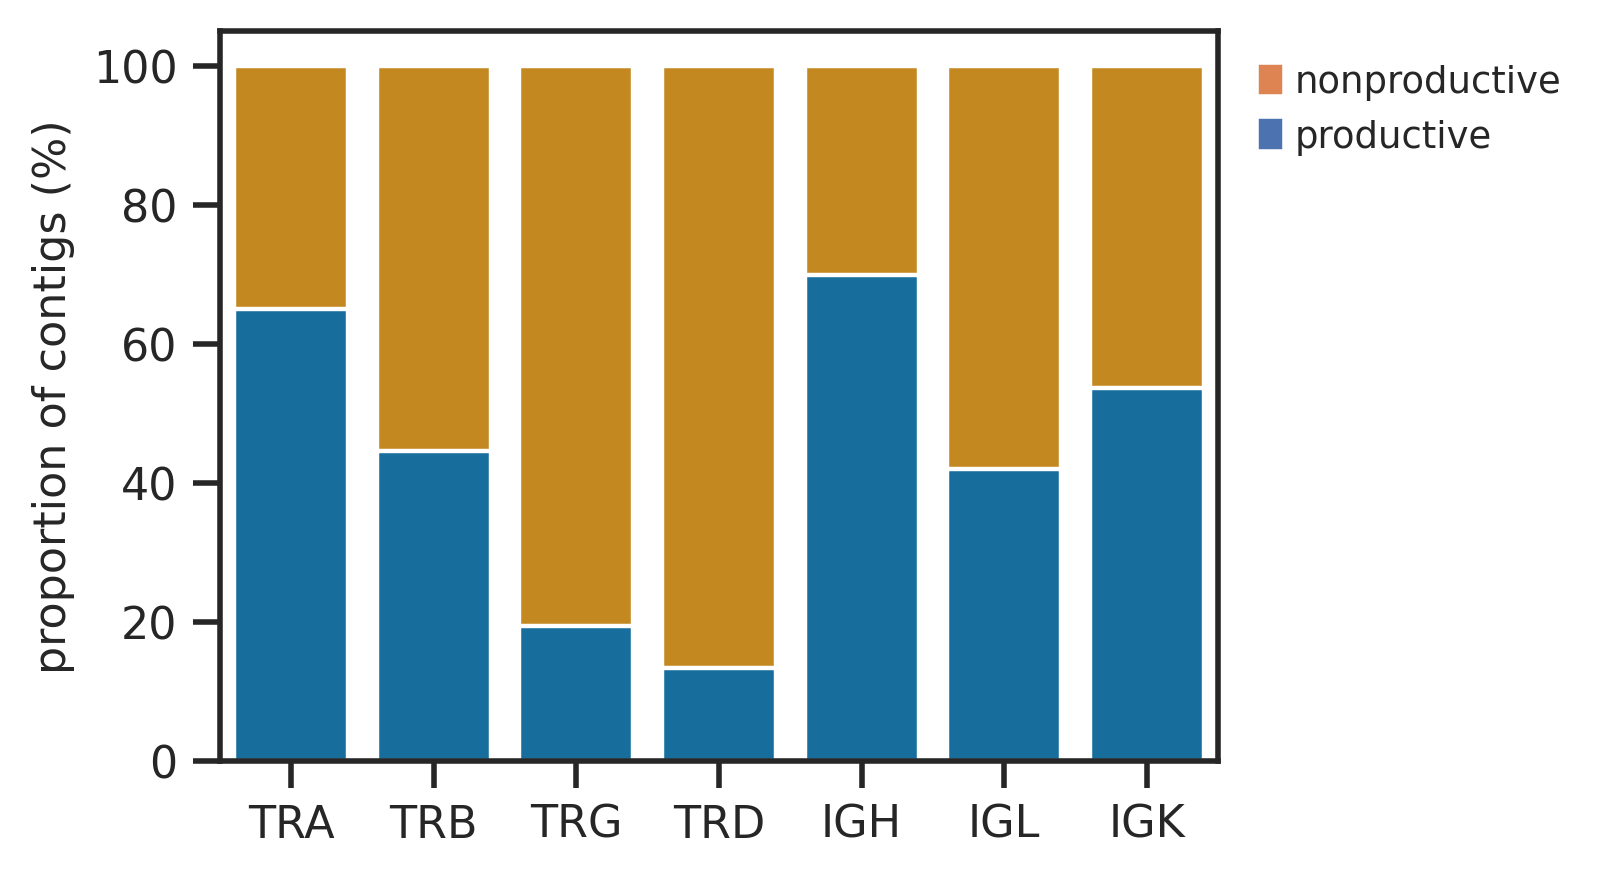

In [25]:
sb.set_theme(style='ticks')
fig, ax = plt.subplots(figsize=(4,3))
legend = []

for i in range(2)[::-1]:
    bar = sb.barplot(x='locus',  y=np.sum(df1.iloc[:,0:i+1],axis=1), data=df1, color=sb.color_palette('colorblind')[i])
    legend = legend+[mpatches.Patch(color=sb.color_palette()[i], label=df1.columns[i])]
plt.xticks(fontsize=10,rotation=0,horizontalalignment='center')
plt.yticks(fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('proportion of contigs (%)', fontsize=10)
#ax.set_title('Proportion of contigs that are productive or nonproductive',fontsize=10)

# add legend
ax.legend(handles=legend,loc='upper left',bbox_to_anchor=(1.01, 1),frameon=False, fontsize='x-small')

plt.savefig(fig_path+'prod_nonprod.pdf',bbox_inches='tight');
#plt.savefig(fig_path+'prod_nonprod_nothymus.pdf',bbox_inches='tight');

In [26]:
df2 = df.loc[['TRA','TRB','TRG','TRD','IGH','IGL','IGK'],['nonprod_noV_perc','nonprod_premature_stop_perc','nonprod_frameshift_perc','locus']]

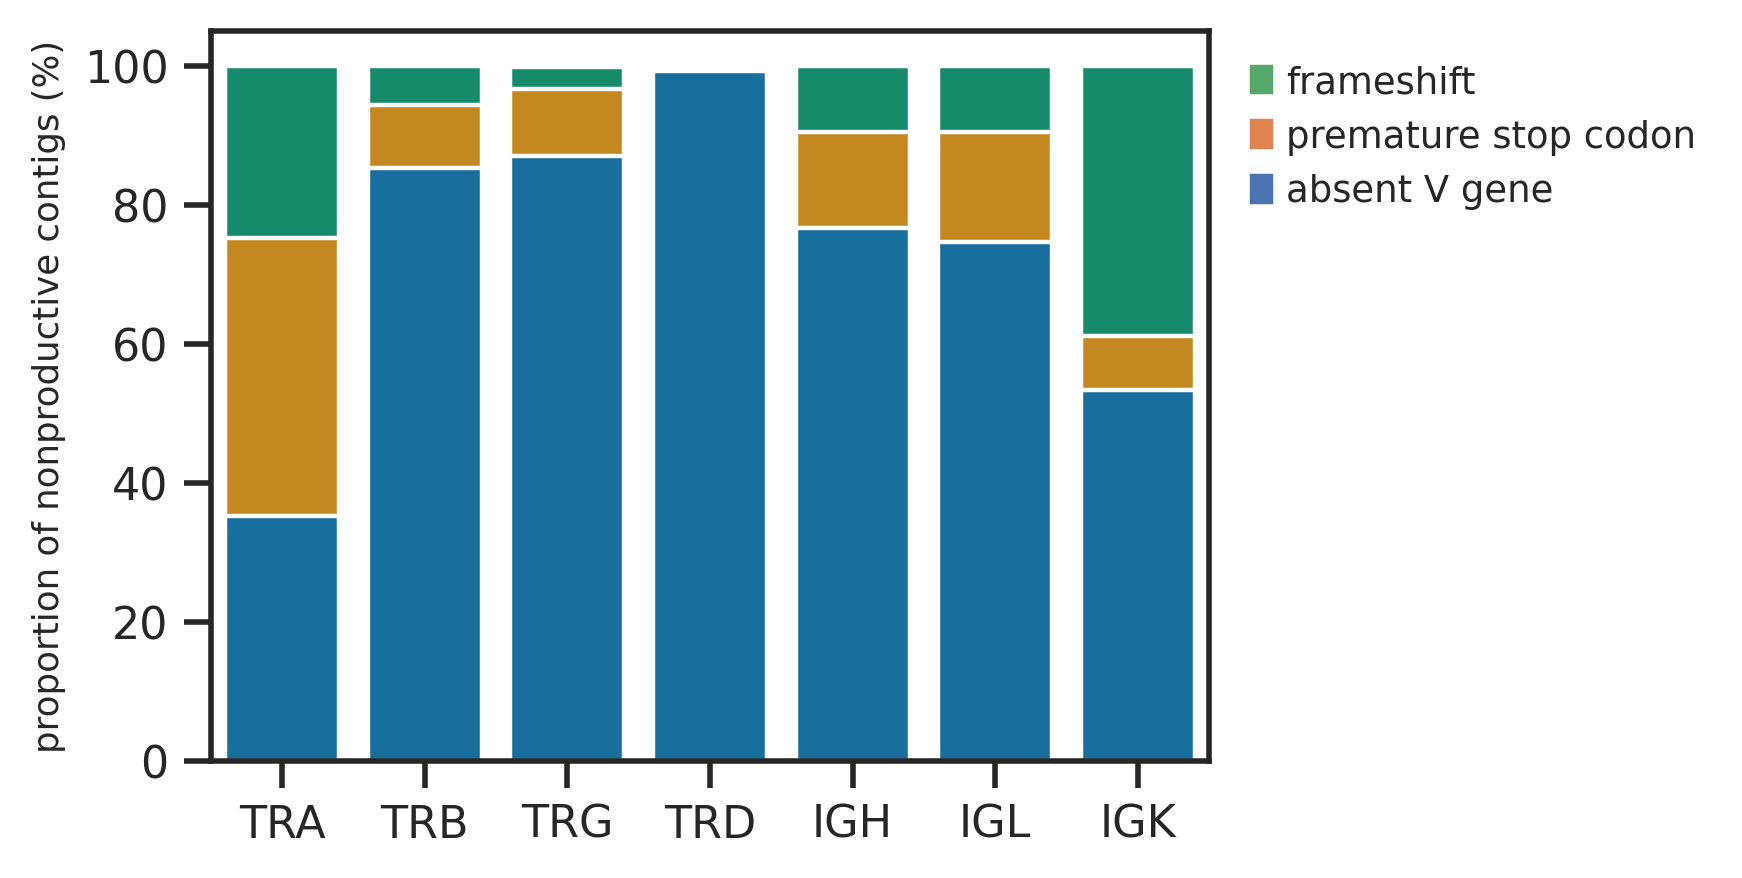

In [27]:
sb.set_theme(style='ticks')
fig, ax = plt.subplots(figsize=(4,3))
legend = []
label = ['absent V gene','premature stop codon','frameshift']

for i in range(3)[::-1]:
    bar = sb.barplot(x='locus',  y=np.sum(df2.iloc[:,0:i+1],axis=1), data=df2, color=sb.color_palette('colorblind')[i])
    legend = legend+[mpatches.Patch(color=sb.color_palette()[i], label=label[i])]
plt.xticks(fontsize=10,rotation=0,horizontalalignment='center')
plt.yticks(fontsize=10)
ax.set_xlabel('', fontsize=8)
ax.set_ylabel('proportion of nonproductive contigs (%)', fontsize=8)
#ax.set_title('Causes of nonproductive contigs', fontsize=10)

# add legend
ax.legend(handles=legend,loc='upper left',bbox_to_anchor=(1.01, 1),frameon=False, fontsize='x-small')

plt.savefig(fig_path+'nonprod_cause.pdf',bbox_inches='tight');
#plt.savefig(fig_path+'nonprod_cause_nothymus.pdf',bbox_inches='tight');

Remove thymus and show the same graphs i.e. they are not just from the developing T cells